In [25]:
import seaborn as sns


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving FTIRspline.csv to FTIRspline.csv


In [27]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['FTIRspline.csv']))

In [28]:
cancer = pd.read_csv('FTIRspline.csv')

In [35]:
cancer.head()

,Diagnosis,698.22975,702.08737,705.94499,709.80262,713.66024,717.51786,721.37549,725.23311,729.09073,732.94836,736.80598,740.6636,744.52122,748.37885,752.23647,756.09409,759.95172,763.80934,767.66696,771.52459,775.38221,779.23983,783.09745,786.95508,790.8127,794.67032,798.52795,802.38557,806.24319,810.10081,813.95844,817.81606,821.67368,825.53131,829.38893,833.24655,837.10418,840.9618,844.81942,...,3857.62293,3861.48055,3865.33817,3869.19579,3873.05342,3876.91104,3880.76866,3884.62628,3888.48391,3892.34153,3896.19915,3900.05678,3903.9144,3907.77202,3911.62965,3915.48727,3919.34489,3923.20251,3927.06014,3930.91776,3934.77538,3938.63301,3942.49063,3946.34825,3950.20588,3954.0635,3957.92112,3961.77874,3965.63637,3969.49399,3973.35161,3977.20923,3981.06686,3984.92448,3988.7821,3992.63973,3996.49735,4000.35497,PCA1,PCA2
0,cancer,0.06532,0.06752,0.06928,0.07048,0.07025,0.06948,0.06882,0.06793,0.06650,0.06403,0.06026,0.05577,0.04978,0.04364,0.03819,0.03363,0.02935,0.02506,0.02121,0.01763,0.01431,0.01127,0.00862,0.00669,0.00537,0.00426,0.00297,0.001550,0.000744,-0.000024,-0.000594,-0.000540,0.000167,0.001130,0.002150,0.003220,0.00467,0.00615,0.00755,...,-0.000003,0.000310,0.000515,0.000999,0.00182,0.00277,0.00351,0.00385,0.00364,0.00290,0.002050,0.001420,0.001230,0.001670,0.002420,0.003000,0.003120,0.002800,0.002400,0.002220,0.002140,0.001920,0.001770,0.002020,0.002570,0.003140,0.003820,0.004580,0.005050,0.004870,0.004020,0.003220,0.003070,0.003280,0.003470,0.00361,0.00369,0.00361,0.073199,0.035048
1,cancer,0.06211,0.06415,0.06515,0.06561,0.06449,0.06265,0.06133,0.06046,0.05940,0.05756,0.05483,0.05146,0.04640,0.04109,0.03635,0.03217,0.02796,0.02371,0.01993,0.01660,0.01364,0.01099,0.00850,0.00664,0.00518,0.00376,0.00229,0.000854,0.000176,-0.000300,-0.000517,-0.000194,0.000717,0.001890,0.003160,0.004710,0.00667,0.00859,0.01050,...,0.000664,0.001080,0.001260,0.001740,0.00250,0.00330,0.00374,0.00368,0.00306,0.00201,0.001070,0.000485,0.000486,0.001050,0.001600,0.001740,0.001420,0.000864,0.000346,0.000171,0.000272,0.000248,0.000048,0.000015,0.000285,0.000561,0.001020,0.001890,0.002560,0.002400,0.001410,0.000456,0.000215,0.000496,0.000937,0.00146,0.00192,0.00193,0.072473,0.082303
2,cancer,0.04216,0.04448,0.04625,0.04758,0.04820,0.04891,0.04917,0.04825,0.04693,0.04525,0.04303,0.04014,0.03621,0.03246,0.02890,0.02558,0.02257,0.01992,0.01732,0.01438,0.01151,0.00931,0.00761,0.00609,0.00470,0.00369,0.00297,0.002170,0.001230,0.000140,-0.000419,-0.000377,-0.000175,0.000010,0.000266,0.000736,0.00143,0.00206,0.00266,...,0.001050,0.000902,0.001000,0.001020,0.00121,0.00163,0.00216,0.00213,0.00172,0.00121,0.000895,0.000814,0.000500,0.000368,0.000844,0.001550,0.001760,0.001500,0.001170,0.000899,0.000677,0.000336,0.000020,0.000006,0.000456,0.001200,0.001940,0.002340,0.002400,0.002440,0.002390,0.002230,0.002010,0.001970,0.002230,0.00230,0.00204,0.00173,-0.037479,-0.031487
3,cancer,0.04773,0.05028,0.05230,0.05367,0.05460,0.05516,0.05500,0.05361,0.05176,0.04950,0.04638,0.04268,0.03800,0.03387,0.03015,0.02665,0.02335,0.02010,0.01708,0.01407,0.01122,0.00886,0.00701,0.00565,0.00463,0.00377,0.00276,0.001690,0.000964,0.000215,-0.000329,-0.000462,-0.000299,-0.000068,0.000231,0.000590,0.00112,0.00168,0.00226,...,0.000545,0.000672,0.000841,0.000922,0.00107,0.00145,0.00183,0.00192,0.00176,0.00135,0.000958,0.000611,0.000265,0.000257,0.000552,0.000876,0.000915,0.000767,0.000629,0.000489,0.000361,0.000179,0.000033,0.000107,0.000399,0.000825,0.001420,0.001940,0.002270,0.002460,0.002390,0.002370,0.002410,0.002500,0.002750,0.00285,0.00288,0.00293,-0.024924,-0.042180
4,cancer,0.04334,0.04723,0.05037,0.05254,0.05372,0.05389,0.05329,0.05248,0.05188,0.05121,0.04960,0.04758,0.04450,0.04136,0.03828,0.03550,0.03331,0.03136,0.02934,0.02730,0.02458,0.02243,0.02016,0.01748,0.01439,0.01132,0.00879,0.006740,0.004790,0.003390,0.002600,0.002510,0.003270,0.004770,0.006770,0.008900,0.01150,0.01456,0.01794,...,0.002600,0.003280,0.003510,0.003360,0.00318,0.00316,0.00296,0.00248,0.00205,0.001

In [36]:
X_cancer = cancer.drop('Diagnosis', axis=1)
X_cancer.shape

(14, 859)

In [37]:
y_cancer = cancer['Diagnosis']
y_cancer.shape

(14,)

In [38]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_cancer)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_cancer)         # 4. Transform the data to two dimensions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


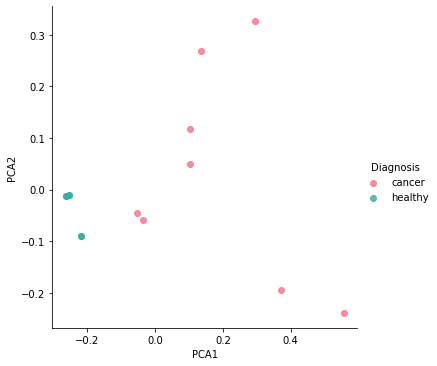

In [39]:
cancer['PCA1'] = X_2D[:, 0]
cancer['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue= 'Diagnosis', palette='husl', data=cancer, fit_reg=False)